In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score as score

In [2]:
DataSet = pd.read_csv("selected_features.csv")
Data = DataSet.iloc[:,1:] # we are taking the whole dataset without the weired coulmn 'Unnamed:0'


# Create the model and train it
k_means = KMeans(n_clusters=2,random_state=42,init='k-means++',max_iter=10)
k_means.fit(Data)

# Extract the labels predicted from the model
labels = k_means.labels_
DataSet['K-means Label'] = labels
print(f"{DataSet.groupby('K-means Label').mean()}\n")

silhouette_score = score(Data,labels)
print(f"Silhouette Score = {silhouette_score:.02f}\n")

if silhouette_score >= 0.45: # Above .45 is good
    print("Approved Score ---> Good Clustering\n")
elif silhouette_score >= 0.25: # Above .25 is not that good but not bad though
    print("Approved Score ---> Not Bad Clustering\n")
else: # Unacceptable
    print("Not Approved ----> Weak Clustering\n") 

               Unnamed: 0        age       sex        cp       fbs   restecg  \
K-means Label                                                                  
0              139.028249  52.231638  0.632768  2.920904  0.146893  0.937853   
1              161.233333  57.950000  0.741667  3.508333  0.141667  1.083333   

                  thalach     exang   oldpeak     slope        ca      thal  \
K-means Label                                                                 
0              165.028249  0.169492  0.655932  1.412429  0.474576  4.242938   
1              126.841667  0.558333  1.645000  1.883333  0.975000  5.450000   

                    num  
K-means Label            
0              0.288136  
1              0.716667  

Silhouette Score = 0.48

Approved Score ---> Good Clustering



In [3]:
with open("evaluation_metrics.txt", "a") as f: # append mode to write on exsistent content
    f.write("\nUnsupervised Model Evaluation Metrics\n")
    f.write("========================\n")
    f.write(f"Silhouette Score of Clustering: {silhouette_score:.2f}\n\n")
    f.write(f"{str(DataSet.groupby('K-means Label').mean())}\n")
    f.write("-"*100)

- Silhoutte_score is not bad but not perfect but I will consider it fine.
- Metrics Added to txt File

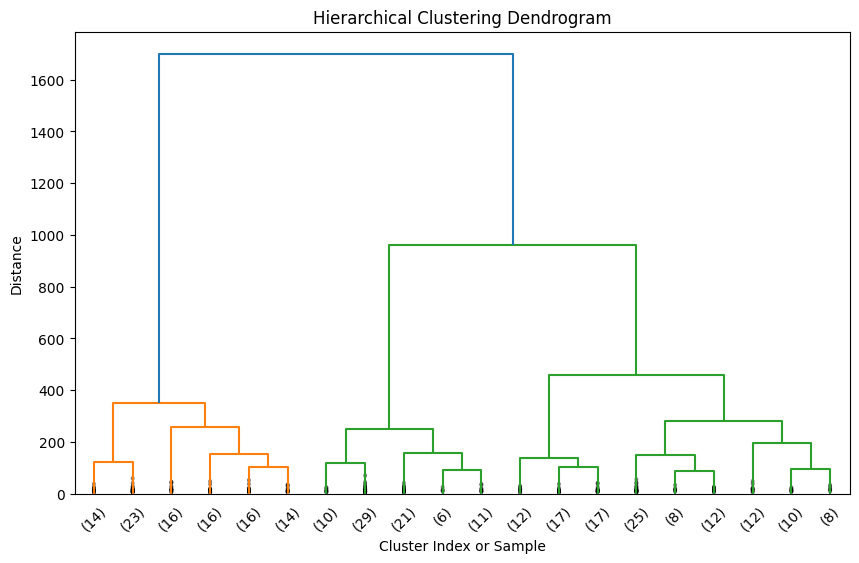

In [4]:
Z = linkage(DataSet, method='ward')

# Plot dendrogram 
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Index or Sample")
plt.ylabel("Distance")
plt.show()

clusters = fcluster(Z,t=2,criterion='maxclust')


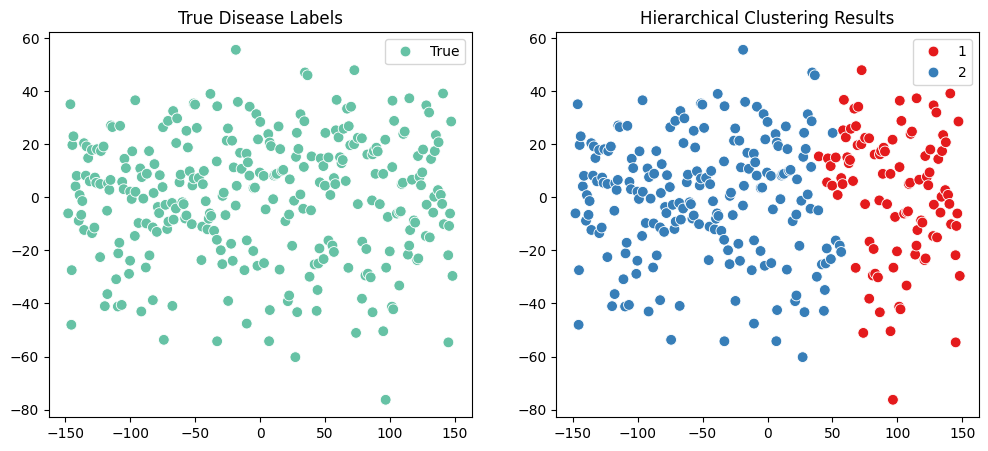

In [5]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(DataSet)

plt.figure(figsize=(12,5))

# True disease labels
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue= True, palette="Set2", s=60)
plt.title("True Disease Labels")

# Cluster assignments
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set1", s=60)
plt.title("Hierarchical Clustering Results")

plt.show()

The model is categorizing (clustering) the data quite well. 